<a href="https://colab.research.google.com/github/bermudezfc/CCMACLRL_EXAM/blob/main/ML_FINALS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
df = pd.read_csv('/content/drive/My Drive/ML FINALS/student_dataset.csv')

In [78]:
df.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,5,1,15,1,1,9,23,27,6,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [80]:
df.value_counts('Target')

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


In [81]:
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


In [82]:
df.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,5,1,15,1,1,9,23,27,6,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [83]:
df.value_counts('Target')

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


In [84]:
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])

In [85]:
df.value_counts('Target')

,count
Target,
2,2209
0,1421
1,794


In [86]:
correlation = df.corr()
correlation

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.224855,-0.125854,0.018925,-0.274939,0.120925,-0.020722,0.185522,0.128326,0.069734,...,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,-0.089804
Application mode,0.224855,1.000000,-0.246497,-0.085116,-0.268616,0.433028,-0.001360,0.092867,0.072798,0.033489,...,0.228973,0.127461,0.164992,-0.065203,-0.104424,0.042009,0.091567,-0.019613,-0.014563,-0.212025
Application order,-0.125854,-0.246497,1.000000,0.118928,0.158657,-0.199029,-0.029385,-0.061719,-0.049936,-0.046591,...,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,0.089791
Course,0.018925,-0.085116,0.118928,1.000000,-0.070232,-0.158382,-0.004761,0.058909,0.045659,0.029672,...,-0.120390,0.185879,0.049236,0.120000,0.178997,-0.013984,-0.050116,0.028775,-0.012518,0.007841
Daytime/evening attendance,-0.274939,-0.268616,0.158657,-0.070232,1.000000,-0.103022,0.024433,-0.195346,-0.137769,-0.037986,...,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,0.075107
Previous qualification,0.120925,0.433028,-0.199029,-0.158382,-0.103022,1.000000,-0.038997,0.018868,0.013152,0.006190,...,0.138463,0.056450,0.101501,-0.037265,-0.038765,0.024186,0.096914,-0.056388,0.053968,-0.091365
Nacionality,-0.020722,-0.001360,-0.029385,-0.004761,0.024433,-0.038997,1.000000,-0.043847,-0.088892,0.044123,...,-0.000747,-0.020103,-0.018023,-0.014142,-0.005409,-0.012052,-0.006013,-0.012331,0.044563,-0.004740
Mother's qualification,0.185522,0.092867,-0.061719,0.058909,-0.195346,0.018868,-0.043847,1.000000,0.524529,0.295178,...,0.036986,0.033070,0.018874,-0.013161,-0.028472,0.020364,-0.106107,0.056653,-0.079664,-0.038346
Father's qualification,0.128326,0.072798,-0.049936,0.045659,-0.137769,0.013152,-0.088892,0.524529,1.000000,0.207067,...,0.041695,0.023635,0.009471,0.006052,-0.006508,-0.008493,-0.075417,0.056661,-0.070200,0.000329
Mother's occupation,0.069734,0.033489,-0.046591,0.029672,-0.037986,0.006190,0.044123,0.295178,0.207067,1.000000,...,-0.002057,0.009287,0.011546,0.022309,0.035230,-0.004903,-0.011772,0.015014,0.091880,0.048424


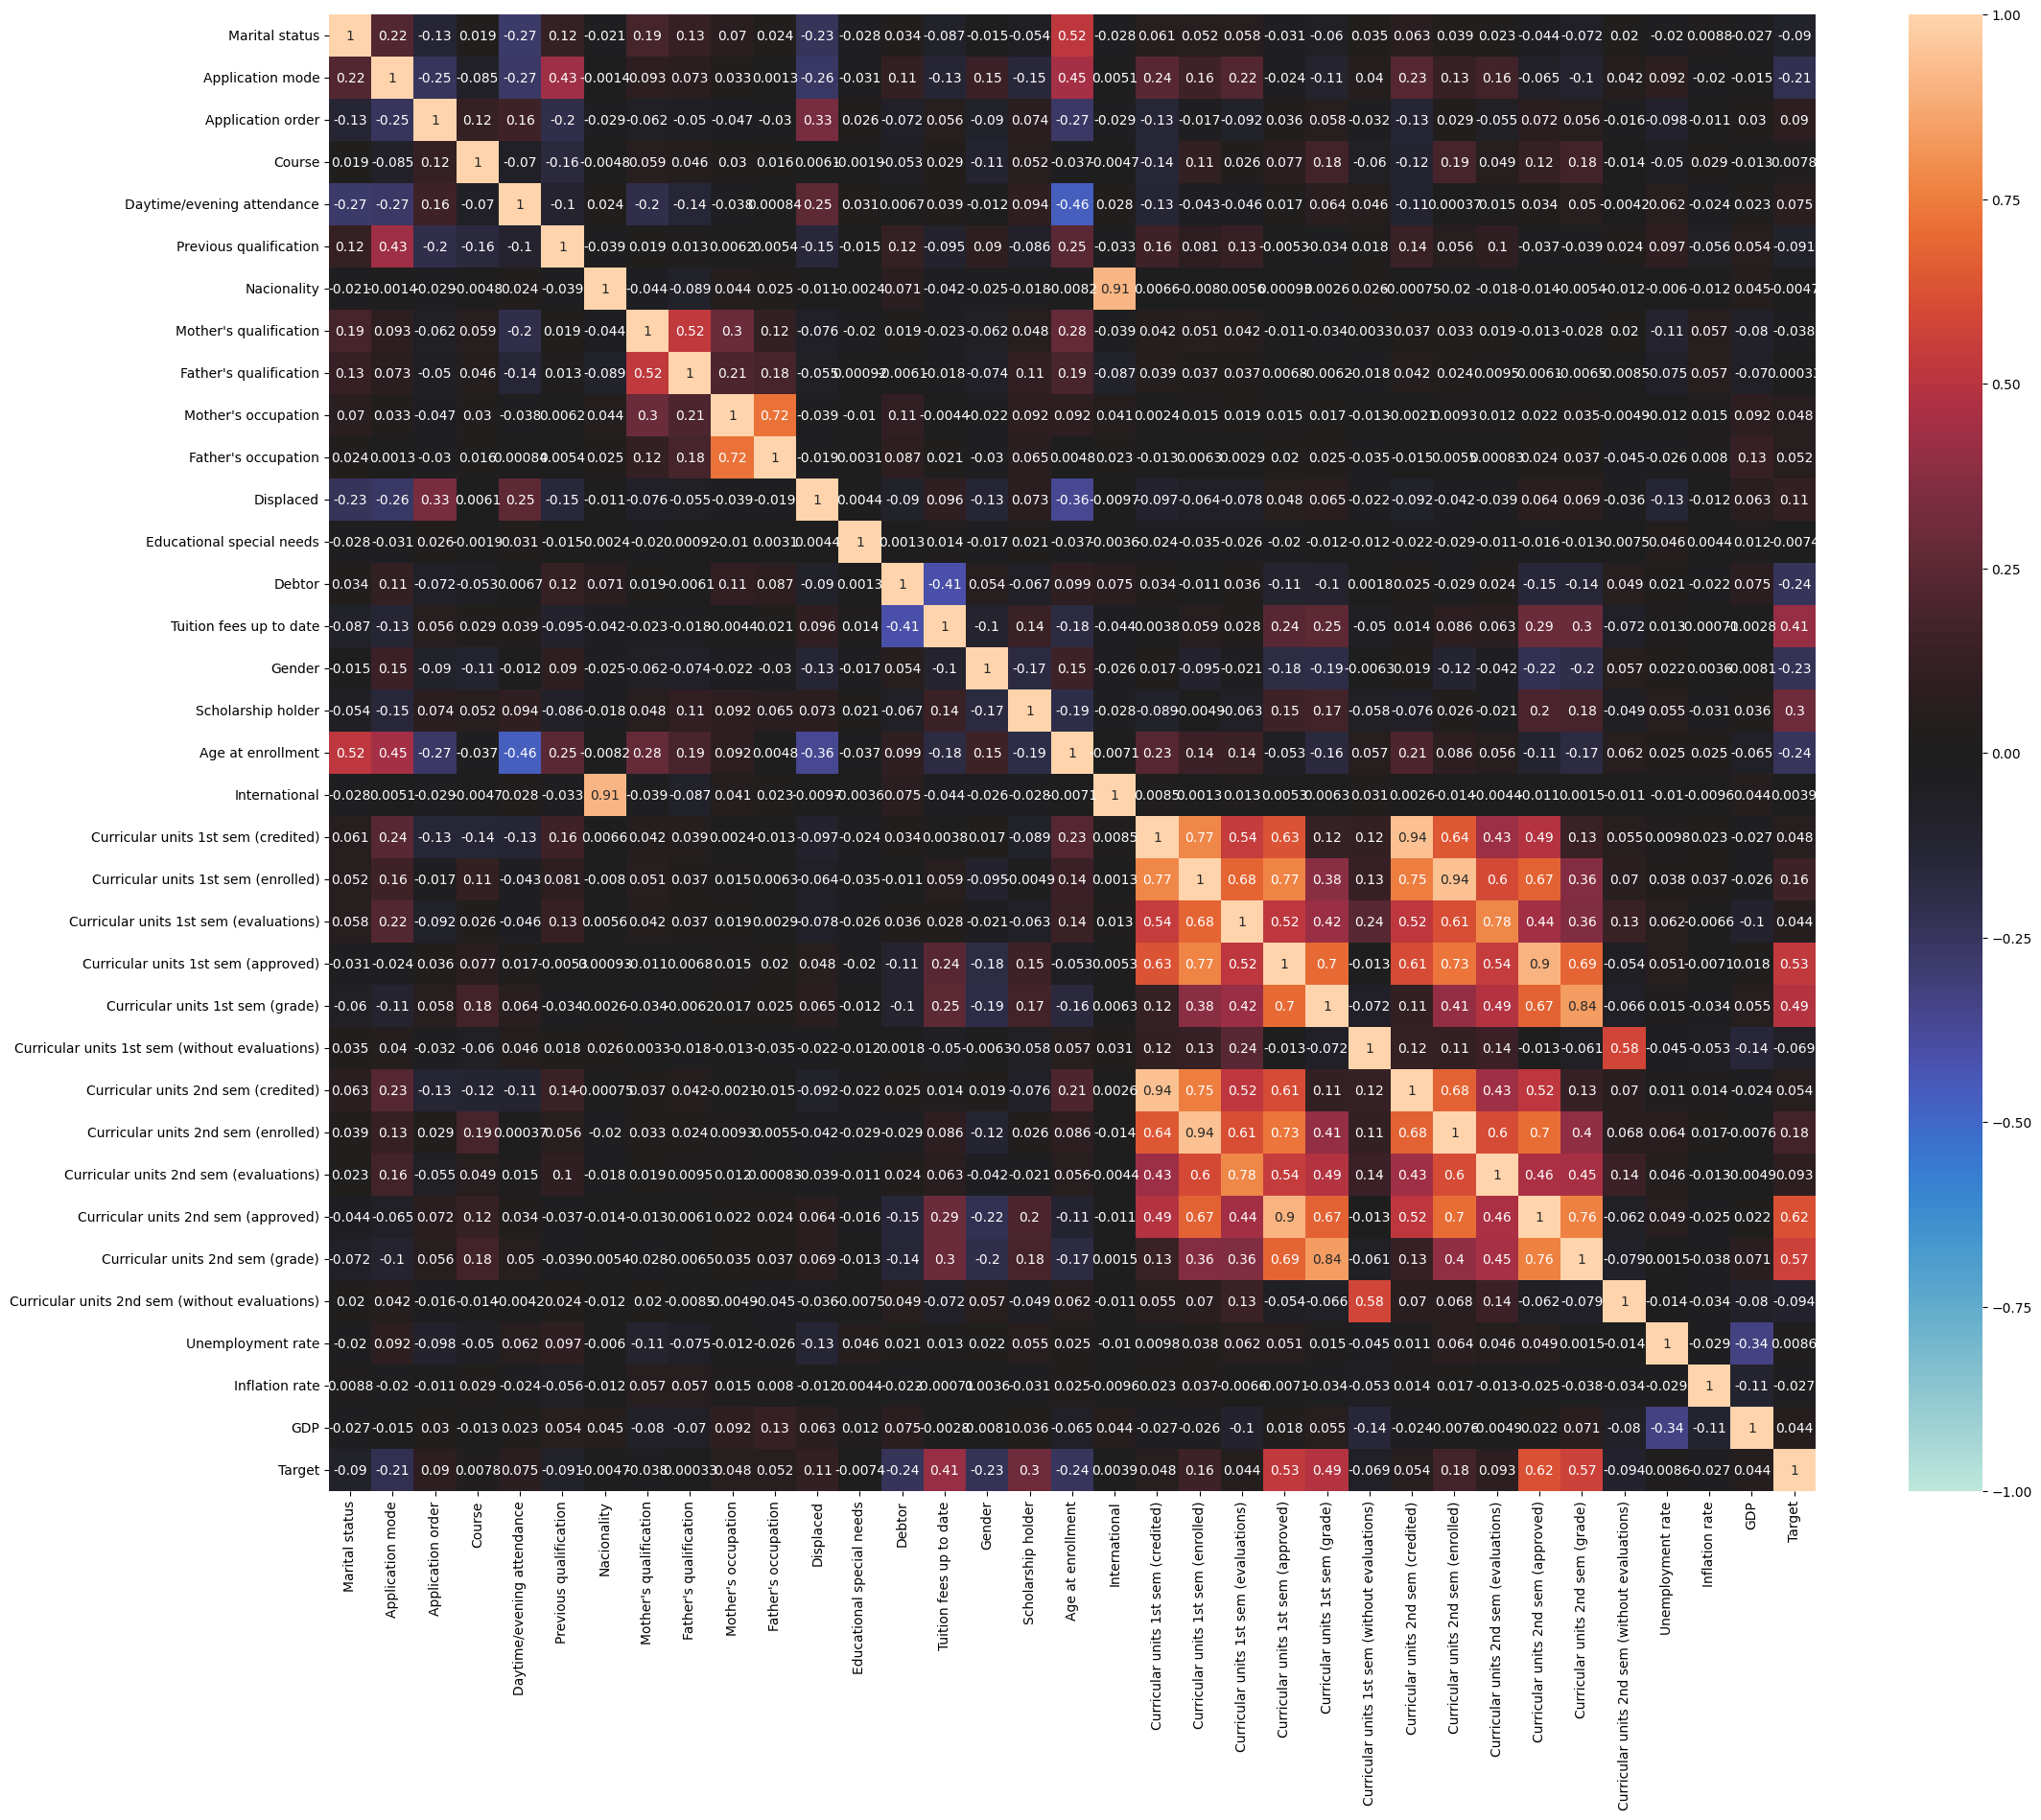

In [87]:
plt.figure(figsize=[25,20])
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

In [88]:
features = (['Age at enrollment', 'Curricular units 2nd sem (credited)', 'Curricular units 1st sem (credited)', 'Scholarship holder', 'Gender', 'Previous qualification', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Application order', 'Course'])
X = df[features]
y = df['Target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=39)

In [89]:
X

,Age at enrollment,Curricular units 2nd sem (credited),Curricular units 1st sem (credited),Scholarship holder,Gender,Previous qualification,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Application order,Course
0,20,0,0,0,1,1,0.000000,0.000000,5,2
1,19,0,0,0,1,1,14.000000,13.666667,1,11
2,19,0,0,0,1,1,0.000000,0.000000,5,5
3,20,0,0,0,0,1,13.428571,12.400000,2,15
4,45,0,0,0,0,1,12.333333,13.000000,1,3
...,...,...,...,...,...,...,...,...,...,...
4419,19,0,0,0,1,1,13.600000,12.666667,6,15
4420,18,0,0,0,0,1,12.000000,11.000000,2,15
4421,30,0,0,1,0,1,14.912500,13.500000,1,12
4422,20,0,0,1,0,1,13.800000,12.000000,1,9


In [90]:
model = LinearRegression()


In [91]:
model.fit(X_train, y_train)
mlrScore = model.score(X_test, y_test)
print(mlrScore)

0.38049028724536316


In [92]:
y_pred = model.predict(X_test)


In [93]:
olsmod = sm.OLS(y_test, X_test).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Target   R-squared (uncentered):                   0.776
Model:                            OLS   Adj. R-squared (uncentered):              0.774
Method:                 Least Squares   F-statistic:                              455.8
Date:                Sat, 02 Nov 2024   Prob (F-statistic):                        0.00
Time:                        05:29:27   Log-Likelihood:                         -1414.5
No. Observations:                1328   AIC:                                      2849.
Df Residuals:                    1318   BIC:                                      2901.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Age at enrollment                       0.0044      0.002      2.186      0.029       0.000       0.008
Curricular units 2nd sem (credited)    -0.0167      0.030     -0.565      0.572      -0.075       0.041
Curricular units 1st sem (credited)     0.0076      0.024      0.310      0.757      -0.040       0.056
Scholarship holder                      0.3794      0.046      8.301      0.000       0.290       0.469
Gender                                 -0.0879      0.042     -2.118      0.034      -0.169      -0.006
Previous qualification                 -0.0005      0.005     -0.098      0.922      -0.011       0.010
Curricular units 1st sem (grade)        0.0161      0.007      2.241      0.025       0.002       0.030
Curricular units 2nd sem (grade)        0.0896      0.007     12.980      0.000       0.076       0.103
Application order                       0.0515      0.015      3.525      0.000       0.023       0.080
Course                                 -0.0178      0.004     -3.998      0.000      -0.027      -0.009
==============================================================================
Omnibus:                       48.996   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.585
Skew:                          -0.488   Prob(JB):                     2.31e-12
Kurtosis:                       3.129   Cond. No.                         72.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50,random_state=1)
rfc.fit(X_train,y_train)
rfc_score = rfc.score(X_test,y_test)

print(f"Score is {rfc_score}")

Score is 0.6882530120481928
